For more tutorials and example scripts, see:
https://pynbody.github.io/pynbody/tutorials/tutorials.html

In [ ]:
import pynbody
import pynbody.plot.sph as sph

import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import scipy.stats as ss

# Loading Romulus simulations


In [ ]:
def load_snapshot0(sim_name): #load z=0 snapshot
    if sim_name == 'Romulus25':
        simdir = '/project/rrg-babul-ad/SHARED/Romulus/cosmo25/'
        param_file = simdir+'cosmo25p.768sg1bwK1BHe75_v4.param'

        ## load snapshot numbers
        filelist = os.listdir(simdir)
        result = [i[-6:] for i in filelist if i.startswith('cosmo25p.') and len(i)==31]
        result.sort()
        result = result[4:]
        snap = result[-1] # snapshot id of z=0 snapshot (i.e. the most recent snapshot)
        data_file = simdir+'cosmo25p.768sg1bwK1BHe75.'+snap

    elif sim_name == 'RomulusC':
        simdir = '/project/rrg-babul-ad/rennehan/romulus_data/h1.cosmo50/'
        param_file = '/project/rrg-babul-ad/rennehan/romulus_data/h1.cosmo50/h1.cosmo50PLK.1536gst1bwK1BH.param'

        filelist = os.listdir(simdir)
        result = [i[-6:] for i in filelist if i.startswith('h1.cosmo50') and len(i)==35]
        result.sort()
        snap = result[-1]
        data_file = simdir+'h1.cosmo50PLK.1536gst1bwK1BH.'+snap

    elif sim_name == 'RomulusG1':
        simdir = '/project/rrg-babul-ad/rennehan/romulus_data/h102054gs/'
        param_file = '/project/rrg-babul-ad/rennehan/romulus_data/h102054gs/h102054gs.param'

        filelist = os.listdir(simdir)
        result = [i[10:-10] for i in filelist if i.startswith('h102054gs.') and len(i)==26]
        result.sort()
        snap = result[-1]
        data_file = simdir+'h102054gs.'+snap

    elif sim_name == 'RomulusG2':
        simdir = '/project/rrg-babul-ad/rennehan/romulus_data/h82651gs/'
        param_file = '/project/rrg-babul-ad/rennehan/romulus_data/h82651gs/h82651gs.param'
        result = [i[9:-10] for i in filelist if i.endswith('amiga.grp') and len(i)==25]
        result.sort()
        snap = result[-1]
        data_file = simdir+'h82651gs.'+snap

    s = pynbody.load(data_file, paramfile = param_file)
    s.physical_units()
    return(s)

In [ ]:
s = load_snapshot0('Romulus25')

In [ ]:
s.all_keys() # print all loadable keys (properties)

['smooth',
 'rho',
 'r',
 'rxy',
 'vr',
 'v2',
 'vt',
 'ke',
 'te',
 'j',
 'j2',
 'jz',
 'vrxy',
 'vcxy',
 'vphi',
 'vtheta',
 'v_mean',
 'v_disp',
 'age',
 'u_mag',
 'u_lum_den',
 'b_mag',
 'b_lum_den',
 'v_mag',
 'v_lum_den',
 'r_mag',
 'r_lum_den',
 'i_mag',
 'i_lum_den',
 'j_mag',
 'j_lum_den',
 'h_mag',
 'h_lum_den',
 'k_mag',
 'k_lum_den',
 'U_mag',
 'U_lum_den',
 'B_mag',
 'B_lum_den',
 'V_mag',
 'V_lum_den',
 'R_mag',
 'R_lum_den',
 'I_mag',
 'I_lum_den',
 'J_mag',
 'J_lum_den',
 'H_mag',
 'H_lum_den',
 'K_mag',
 'K_lum_den',
 'theta',
 'alt',
 'az',
 'cs',
 'mu',
 'p',
 'u',
 'temp',
 'zeldovich_offset',
 'aform',
 'tform',
 'smooth2',
 'soft',
 'mass',
 'vel',
 'phi',
 'pos',
 'rung',
 'grp',
 'iord']

In [ ]:
rho = s.gas['rho'] # load densities of all gas particles (defult unit is solar mass per cubic kpc) # s.s for stars # s.dm for dark matter
rho

SimArray([2.4611591e+02, 8.8074316e+03, 2.3067458e+03, ..., 4.8889240e+01,
          4.1915102e+06, 3.8153110e+03], dtype=float32, 'Msol kpc**-3')

In [ ]:
s.s['tform']

SimArray([ 0.13926223,  0.14012274,  0.14098324, ..., 14.113895  ,
          14.113895  , 14.113895  ], dtype=float32, 'kpc s km**-1')

In [ ]:
rho.in_units('g cm**-3') # print densities of all gas particles in gram per cubic cm unit

SimArray([1.6661122e-29, 5.9623002e-28, 1.5615802e-28, ..., 3.3096181e-30,
          2.8374950e-25, 2.5828223e-28], dtype=float32, 'g cm**-3')

Text(0, 0.5, 'Log T [K]')

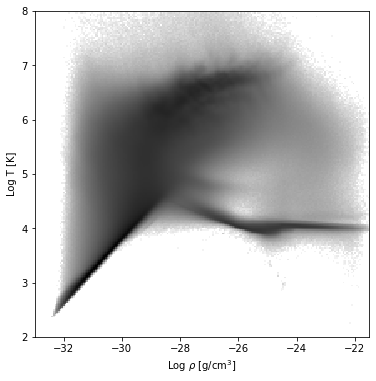

In [ ]:
plt.figure(figsize = (6,6))
hist = plt.hist2d( np.log10(rho.in_units('g cm**-3')), np.log10(s.gas['temp']), bins = 200, norm = LogNorm(), cmap = 'binary', range = [[-33,-21.5],[2,8]])

plt.xlabel('Log $\\rho$ [g/cm$^{3}$]')
plt.ylabel('Log T [K]')



In [ ]:
h = s.halos(ahf_mpi = True) #load halo catalogue
len(h) # There are a LOT of halos at z=0. You'll need to decide what kind of sample you want. (e.g., mass, host halo, etc)

103222

In [ ]:
## for example, if you want a list of halo ids that is (i) a host and (ii) above M200>10^12 solar mass,
## it takes some time so don't run this cell for now
## it'll be easier if you save this list as a file and load it later

"""
haloid_list = []
for i in range(1,len(h)+1):
    mhal = np.log10(h[i].properties['mass']/s.properties['h'])
    if h[i].properties['hostHalo']==0 and mhal>12:
        print(i)
        haloid_list.append(i)
"""


1
1241


In [ ]:
## Now, let's focus on one specific halo
haloid = 65502.
h0 = h[haloid]

In [ ]:
#print available halo properties given by Amiga Halo Finder
#check this document for descriptions of each field http://popia.ft.uam.es/AHF/files/AHF.pdf
h0.properties

{'a': 1.0000000000074651,
 'omegaM0': 0.3086,
 'omegaL0': 0.6914,
 'h': 0.6776931508813172,
 'boxsize': Unit("2.50e+04 kpc"),
 'time': Unit("1.41e+01 kpc s km**-1"),
 'halo_id': 65502.0,
 '#ID': 8918469043674803866,
 'hostHalo': 0,
 'numSubStruct': 1071,
 'mass': 14010500000000.0,
 'npart': 79158668,
 'Xc': 12460.54299652,
 'Yc': 5813.16128416,
 'Zc': 14751.15441981,
 'VXc': -41.66,
 'VYc': -10.35,
 'VZc': -30.39,
 'Rvir': 489.22,
 'Rmax': 122.09,
 'r2': 0.64923,
 'mbp_offset': 0.39166,
 'com_offset': 11.55342,
 'Vmax': 400.82,
 'v_esc': 496.420427,
 'sigV': 415.32,
 'lambda': 0.020862,
 'lambdaE': 0.021252,
 'Lx': -0.3759,
 'Ly': 0.9224,
 'Lz': -0.08819,
 'b_axis': 0.878528,
 'c_axis': 0.836534,
 'Eax': 0.829991,
 'Eay': 0.549115,
 'Eaz': -0.09792,
 'Ebx': 0.141333,
 'Eby': -0.037217,
 'Ebz': 0.989262,
 'Ecx': -0.539574,
 'Ecy': 0.834918,
 'Ecz': 0.108498,
 'ovdens': 333.52,
 'nbins': 45,
 'fMhires': 0.998831,
 'Ekin': 1.20834e+18,
 'Epot': -2.10366e+18,
 'SurfP': -2.5363e+17,
 'Phi0'

In [ ]:
h0.s['mass'].sum()

SimArray(1.02898246e+11, dtype=float32, 'Msol')

In [ ]:
## Determine the center of mass of the given particles, then recenter accordingly
pynbody.analysis.halo.center(h0,mode='hyb')


/home/seoyoung/anaconda3/lib/python3.7/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]


Text(0, 0.5, 'Count')

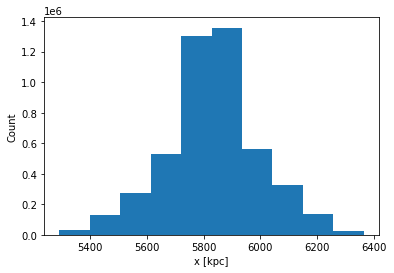

In [ ]:
plt.hist(h0.gas['pos'][:,0])
plt.xlabel('x [kpc]')
plt.ylabel('Count')

In [ ]:
## take particles within 35 kpc/h =approx 50kpc sphere
s_filt = h0[pynbody.filt.Sphere('35 kpc h^-1')]


Text(0, 0.5, 'y [kpc]')

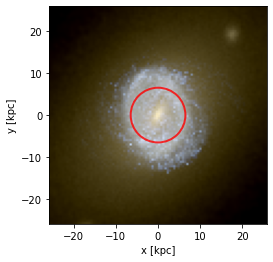

In [ ]:
## Rendering image of a galaxy (this takes quite some time to run)
"""
rgb = pynbody.plot.stars.render(s_filt.star[np.isnan(s_filt.star['r_lum_den'])==False], width = '35 kpc h^-1', resolution = 100, mag_range = [17,26],plot = False,ret_im = True)

width = 35/s.properties['h']
plt.imshow(rgb[::-1,:],extent=(-width / 2, width / 2, -width / 2, width / 2))

circle = plt.Circle((0, 0), 6.5, facecolor = 'none', edgecolor='r', linewidth = 2, alpha = 0.8)
plt.gca().add_patch(circle)

plt.xlabel('x [kpc]')
plt.ylabel('y [kpc]')
"""

(25.0, 17.0)

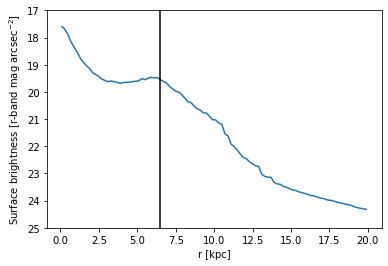

In [ ]:
prof = pynbody.analysis.profile.Profile(s_filt.star, min = 0, max = 20, band = 'r')

plt.plot(prof['rbins'], prof['sb']) # pynbody calculates sb assuming distance = 10pc (https://pynbody.github.io/pynbody/_modules/pynbody/analysis/profile.html#Profile)
plt.axvline(6.5, color = 'k')
plt.xlabel('r [kpc]')
plt.ylabel('Surface brightness [r-band mag arcsec$^{-2}$]')
plt.ylim(25,17)

In [ ]:
def fig_kinematics(part, title = ''): # make a figure showing a line-of-sight velocity map
    grid = 100 #set number of pixels
    n_spax_gas = ss.binned_statistic_2d(part['x'],part['y'], values = part['vel'][:,2], statistic = 'count', bins = [grid,grid], range = [[-20,20],[-20,20]])
    v_spax_gas = ss.binned_statistic_2d(part['x'],part['y'], values = part['vel'][:,2], statistic = np.mean, bins = [grid,grid], range = [[-20,20],[-20,20]])

    plt.figure(figsize = (12,5), facecolor = 'w')
    plt.subplot(121)
    plt.imshow(n_spax_gas.statistic.T, cmap = 'binary_r', extent = [-20,20,-20,20], origin = 'lower', norm = LogNorm())
    plt.colorbar(shrink = 0.6)
    plt.xlabel('x [kpc]')
    plt.ylabel('y [kpc]')
    plt.title('N particles')

    plt.subplot(122)
    plt.imshow(v_spax_gas.statistic.T, cmap = 'RdYlBu', vmax = 300, vmin = -300, extent = [-20,20,-20,20], origin = 'lower')
    plt.colorbar(shrink = 0.6)
    plt.xlabel('x [kpc]')
    plt.ylabel('y [kpc]')
    plt.title('V$_{LOS}$')

    plt.suptitle(title)
    plt.show()


/home/seoyoung/anaconda3/lib/python3.7/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]


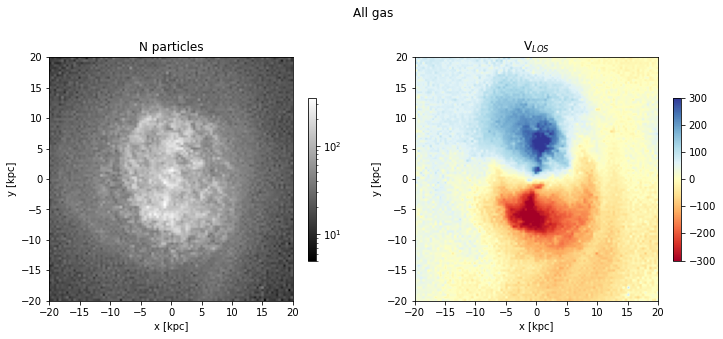

/home/seoyoung/anaconda3/lib/python3.7/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]


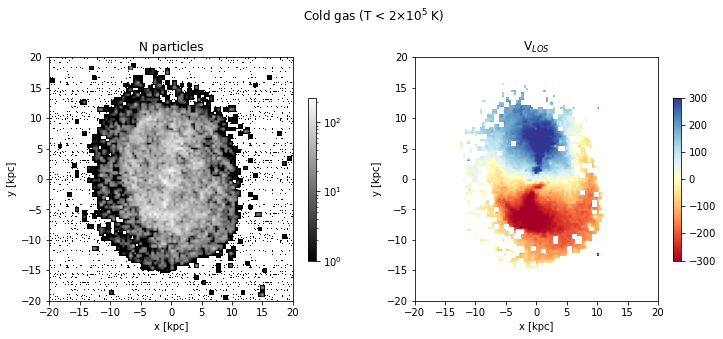

/home/seoyoung/anaconda3/lib/python3.7/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]


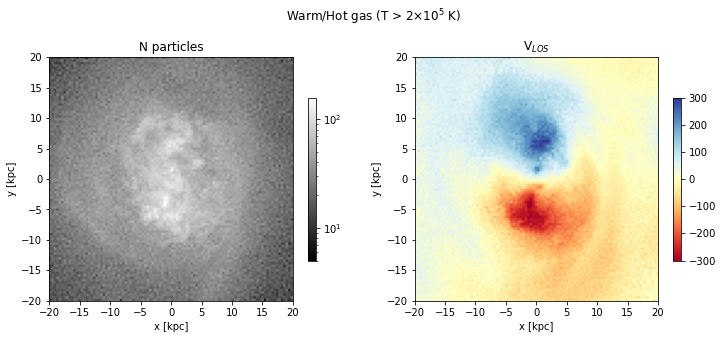

/home/seoyoung/anaconda3/lib/python3.7/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]


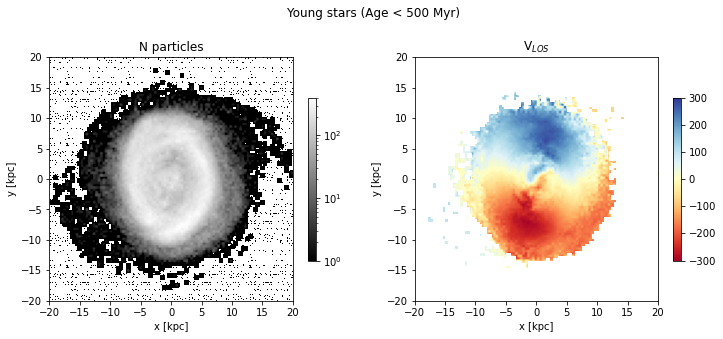

/home/seoyoung/anaconda3/lib/python3.7/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]


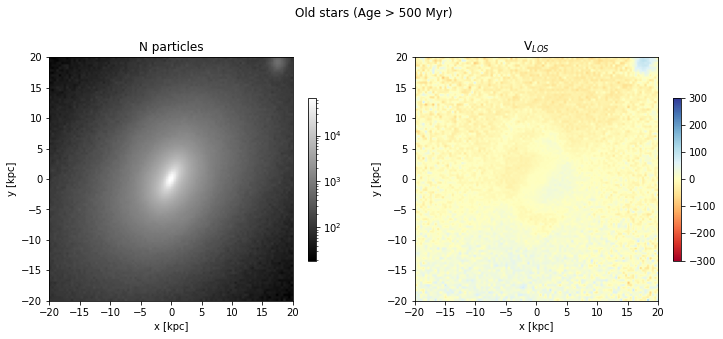

In [ ]:
part = s_filt.gas
fig_kinematics(part, title = 'All gas')

part = s_filt.gas[s_filt.gas['temp']<2e4]
fig_kinematics(part, title = 'Cold gas (T < 2$\\times$10$^{4}$ K)')

part = s_filt.gas[s_filt.gas['temp']>2e4]
fig_kinematics(part, title = 'Warm/Hot gas (T > 2$\\times$10$^{4}$ K)')

part = s_filt.star[s_filt.star['age'].in_units("Gyr")<0.5]
fig_kinematics(part, title = 'Young stars (Age < 500 Myr)')

part = s_filt.star[s_filt.star['age'].in_units("Gyr")>0.5]
fig_kinematics(part, title = 'Old stars (Age > 500 Myr)')


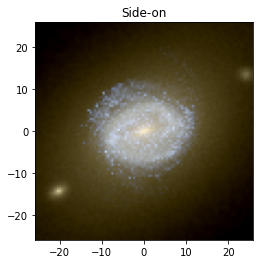

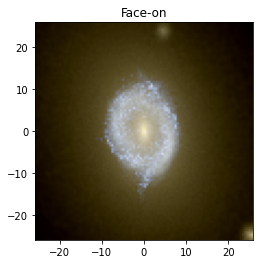

In [ ]:
width = 35/s.properties['h']

## You can rotate the halo to get a face-on or edge-on view of the central galaxy
pynbody.analysis.angmom.sideon(s_filt,disksize = '2 kpc',move_all = False, cen = [0,0,0], vcen = [0,0,0])

rgb = pynbody.plot.stars.render(s_filt.star[np.isnan(s_filt.star['r_lum_den'])==False], width = '35 kpc h^-1', resolution = 100, mag_range = [17,26],plot = False,ret_im = True)
plt.imshow(rgb[::-1,:],extent=(-width / 2, width / 2, -width / 2, width / 2))
plt.title('Side-on')
plt.show()

pynbody.analysis.angmom.faceon(s_filt,disksize = '2 kpc',move_all = False, cen = [0,0,0], vcen = [0,0,0])

rgb = pynbody.plot.stars.render(s_filt.star[np.isnan(s_filt.star['r_lum_den'])==False], width = '35 kpc h^-1', resolution = 100, mag_range = [17,26],plot = False,ret_im = True)
plt.imshow(rgb[::-1,:],extent=(-width / 2, width / 2, -width / 2, width / 2))
plt.title('Face-on')
plt.show()


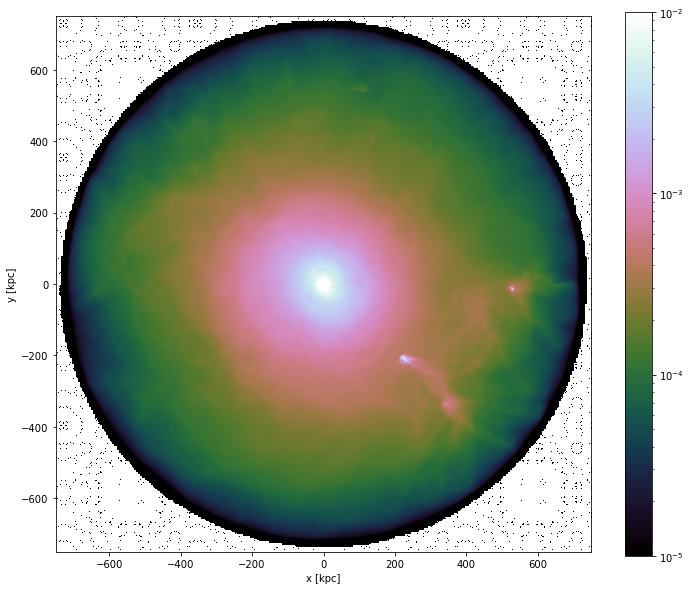

In [ ]:
## plot gas density projection map
gas_density = sph.image(h0.gas, qty="rho", units="g cm^-2", width='1500 kpc',cmap="cubehelix", noplot = True)

plt.figure(figsize = (12,10))
plt.imshow(gas_density, cmap = 'cubehelix', norm = LogNorm(vmin = 1e-5, vmax = 1e-2), extent = [-1500/2, 1500/2, -1500/2, 1500/2], origin = 'lower')
plt.colorbar()
plt.xlabel('x [kpc]')
plt.ylabel('y [kpc]')

plt.show()

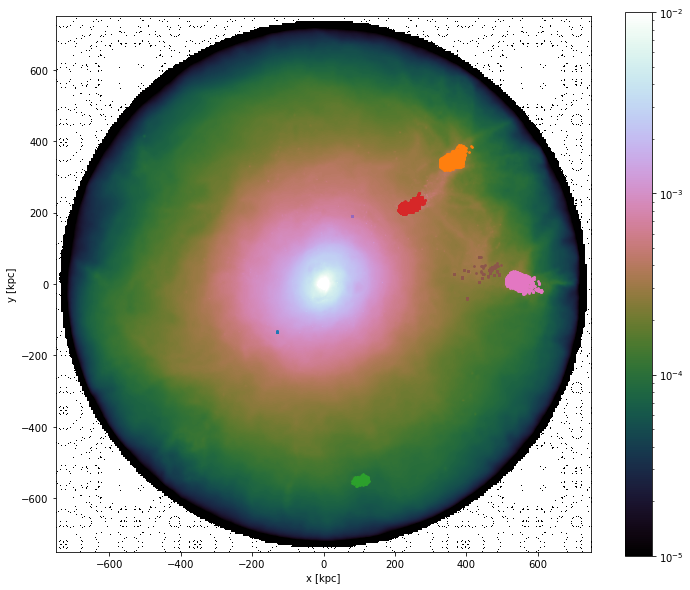

In [ ]:
## 'grp' key shows which subhalo each particle belongs to
## if not associated with a satellite/subhalo, grp == host halo id
plt.figure(figsize = (12,10))
plt.imshow(gas_density, cmap = 'cubehelix', norm = LogNorm(vmin = 1e-5, vmax = 1e-2), extent = [-1500/2, 1500/2, -1500/2, 1500/2], origin = 'lower')
plt.colorbar()
plt.xlabel('x [kpc]')
plt.ylabel('y [kpc]')


all_ids = np.unique(h0.gas['grp'])

for ids in all_ids:
    if ids != haloid:
        plt.scatter(h0.gas['x'][h0.gas['grp']==ids], h0.gas['y'][h0.gas['grp']==ids], s = 3)


In [ ]:
## subhalos are identified based on the dark matter distribution
## not all subhalos have stellar or gas component associated with them

print(len(np.unique(h0['grp'])))
print(len(np.unique(h0.dm['grp'])))
print(len(np.unique(h0.gas['grp'])))
print(len(np.unique(h0.star['grp'])))

1163
1163
8
580
